# Cyber attack dataset Analysis :
This notebook provides a description of the dataset Cyber_attacks (available in Kaggle [1] )\
It supplies 40 000 synthetic records spread in 25 attributes, each row corresponding to an attack type : Malware, DDoS and Intrusion. These later are used by hackers\pirates to compromise a target's IT security by violating the integrity, confidentiality and availability of sensitive data such as personal, financial, industrial or security information.
- Malware is a  malicious software produced to damage a computer system (e.g. viruses, Trojans, ransomware),
 - DDoS (Distributed Denial of Service) is a set of computer attacks designed to overwhelm a server or network with a large number of requests, overloading it or rendering it unavailable,
  - Intrusion is an unauthorized accesses to a computer system to extract, modify or destroy data via security holes [2].\

These dataset records attacks occurred from January 1, 2020, to October 11, 2023.

The aim of the present notebook is to understand the 3 types of attack and their correlation with the attributes in order to  predict them using a machine learning approach.
To answer this objective, our study is organized in four parts:
1. Exploration of raw data
2. Features engineering
3. Prediction of future attacks
4. Conclusion

*This project describes group work by Victor Coppin, Damien Rondet, Sachiththa Konara Mudiyanselage, Hugo Carton, Nans Long and Naro Kuoch.*




Before to go deeply in details in the overview of our data set, we need to describe the attributes.
These later are described in the list below, from information of wikipedia :
- Timestamp: Attack date and schedule
- Source IP Address: Pirate IP Address
- Destination IP Address: Recipient IP Address IP
- Source Port:Port used by Pirate
- Destination Port: Port used by Host target
- Protocol: Network protocol used in the communication Pirate/Host target
- Packet Length: Packet size (bytes)
- Packet Type: Packet classification
- Traffic Type: Characterization of network traffic
- Payload Data: Data carried in the packet
- Malware Indicators: Signs of  Pirates software
- Anomaly Scores: Numerical score of  a suspicious behavior in comparison to control condition
- Alerts/Warnings: Security message to notify an unusual event
- Attack Type: Identification of a Pirate attack
- Attack Signature: Specific pattern of Pirate attack
- Action Taken: Defense responses
- Severity Level: Impact level of the event
- User Information: User informations
- Device Information: Device informations
- Network Segment: The part of the network touched by the attack
- Geo-location Data: Geographic location of Pirate
- Proxy Information: Proxy server IP address
- Firewall Logs: Recording of firewall activities
- IDS/IPS Alerts: Alerts from intrusion detection system/ intrusion prevention system
- Log Source: identifies the origin of a recorded event


 In our exploration of raw data, we performed an overview of data set without transformations or creations of new variables in order to see the relations between the attributes. For this purpose, we examined the device responses, then the network traffic category, and we finished with a temporal vision of all the survey.

# 1. Exploration of raw data

In [6]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = 'Data/cybersecurity_attacks.csv'
df = pd.read_csv(dataset_path)

## 1.1   Evaluation of damage impacts from 3 different attack types

In first part, we decided to focus on device reactions (defense) induced by the three attack types.
To do this, we focused on **actions taken** in function of **attack types**.


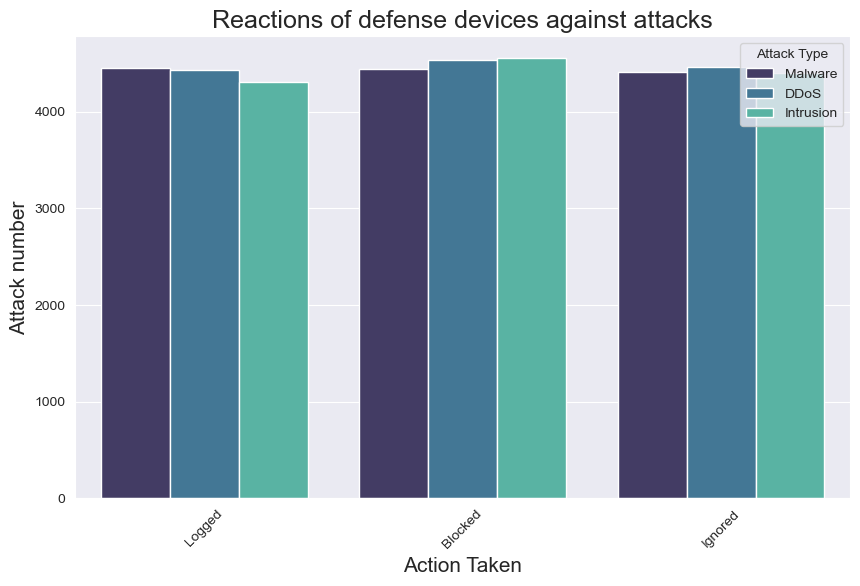

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Action Taken", hue="Attack Type", data=df, palette = "mako")
plt.title("Reactions of defense devices against attacks", fontsize=18)
plt.ylabel('Attack number', fontsize=15)
plt.xlabel("Action Taken", fontsize=15)
plt.xticks(rotation=45)
plt.show()



Among all modalities, we remarked the same defense responses, suggesting in our conditions that the three attacks types could activate the same device reactions. This result is not surprising according to previous definitions (nature type of attacks) because we supposed that attacks could induce different defense responses as  Malware by antivirus and DDoS or Intrusions by Firewalls  [2]).
In our case, there is no relationship between attack and the action taken by the devices.

To compare with the previous countplot, we tryed to determine the impact of each event using the severity level.

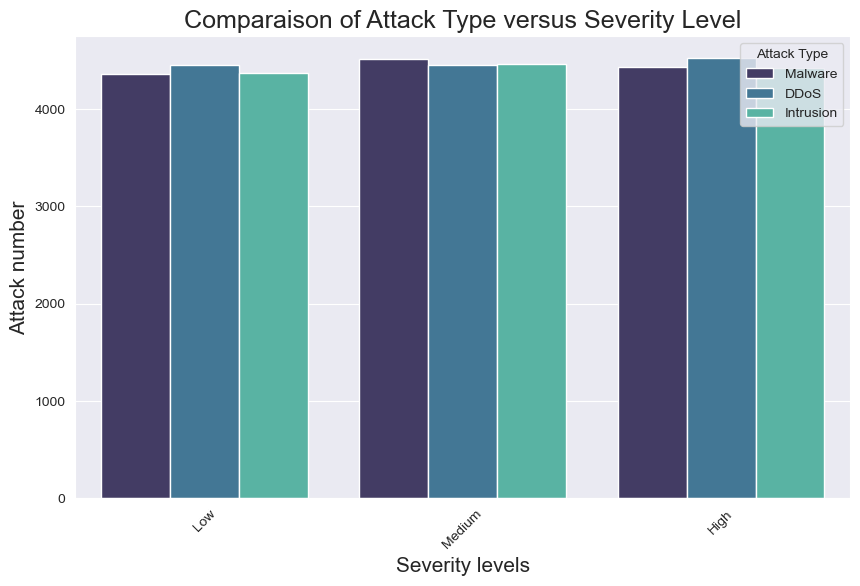

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity Level', hue='Attack Type', data=df, palette = "mako")
plt.title('Comparaison of Attack Type versus Severity Level', fontsize=18)
plt.ylabel('Attack number', fontsize=15)
plt.xlabel("Severity levels", fontsize=15)
plt.xticks(rotation=45)
plt.show()




As before, we detect the same signal between the modalities, suggesting an equivalent severity level induced by the three attack types on devices. This feature didn't provide enough details on the defense origin activated by the attack ( for instance : malware/antivirus, DDos/firewall, Intrusion/firewall-IDS/IPS

) jklajkl)00 jkldjfk)0jklajfkldjakljdfkljakljfklajfkljakljfakljfklajklfjklajm

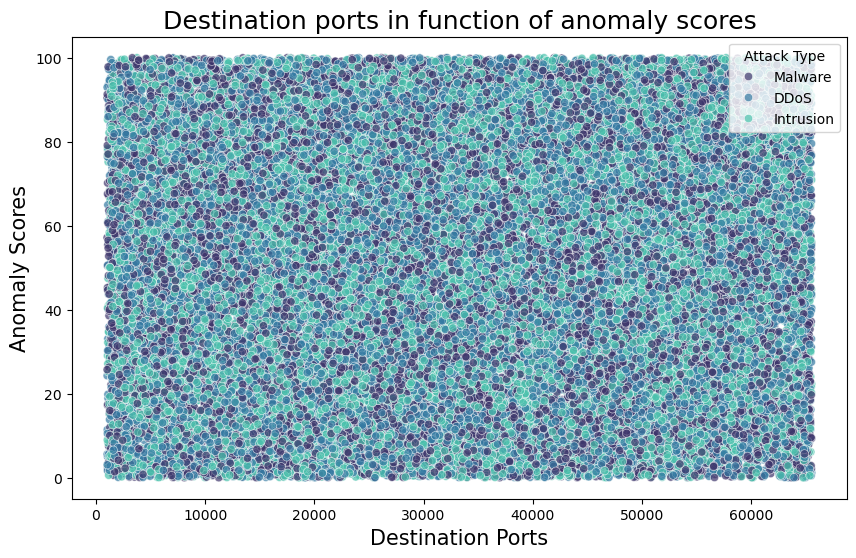

In [7]:
)plt.figure(figsize=(10, 6))
sns.scatterplot(x="Destination Port", y="Anomaly Scores", hue="Attack Type", data=df, palette="mako", alpha=0.7)
plt.title("Destination ports in function of anomaly scores", fontsize=18)
plt.xlabel("Destination Ports", fontsize=15)
plt.ylabel("Anomaly Scores", fontsize=15)
plt.legend(title="Attack Type", bbox_to_anchor=(1,1), loc="upper right")
plt.show()

#Every digital devices use ports to receive and send data via the internet or a network.
#The destination ports represents, in our context, the ports where packets containing malicious data are sent from the hacker to the target in an attempt to
#exploit a service or vulnerability. For example, ports 80, 443, 8080 and 8443 are commonly used for DDoS attacks [3].
#Malwares are a computer programs recognized by antivirus. They are therefore correlated by high abnormal scores
#compared to DDoS and intrusions, which are more difficult to detect because defenses are not able to accurately identify these attacks [1].
#Given this information, we set out to determine in our data set whether there was a relationship between the
#destination ports and the abnormal scores for a suspicious event, depending on the type of attack.
#The data presented in this scatterplot show a great diversity of values, which do not allow us to obtain
#clearly clusters defined by precise parameters. All the points are arranged heterogeneously across the whole figure,
#without showing any dependency between destination ports, abnormal scores and the type of attack as dissussed before.
#Thus, these results suggest the absence of relationships between these parameters in our data set.
# victor : would introduce this view later with the featuring in 3 parts

In [8]:
# Evaluation of the sensibility of attack type by the network traffic category

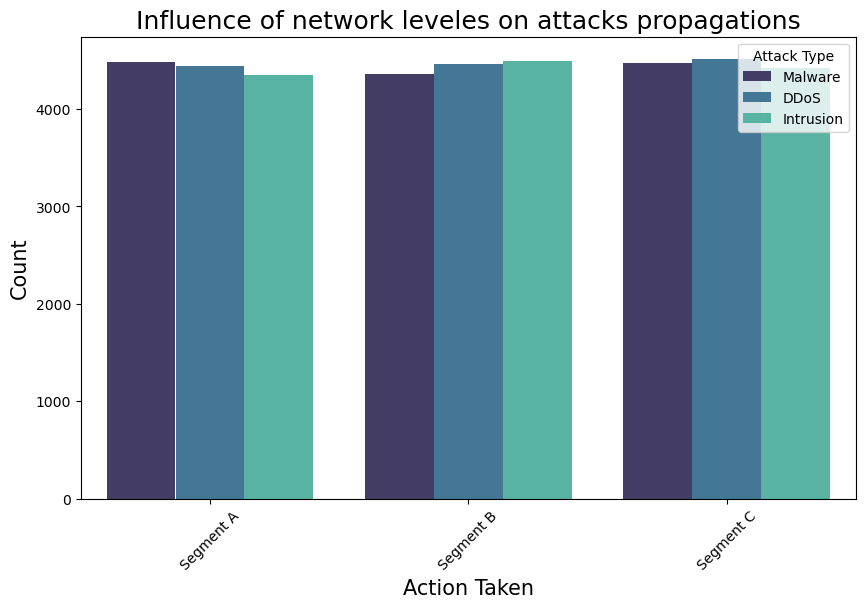

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Network Segment", hue="Attack Type", data=df, palette = "mako")
plt.title("Influence of network leveles on attacks propagations", fontsize=18)
plt.ylabel('Count', fontsize=15)
plt.xlabel("Action Taken", fontsize=15)
plt.xticks(rotation=45)
plt.show()

#Network segmentation is a means of protection against cyberattacks, because dividing a computer
#park into subnetworks (seceurs) by assigning different access rights according to status limit the exposure
#of sensitive data to personal who do not need to use this information (administrators versus Research unit) [1].
#In our contex, we determine no influence of segmentation on attack kinds.

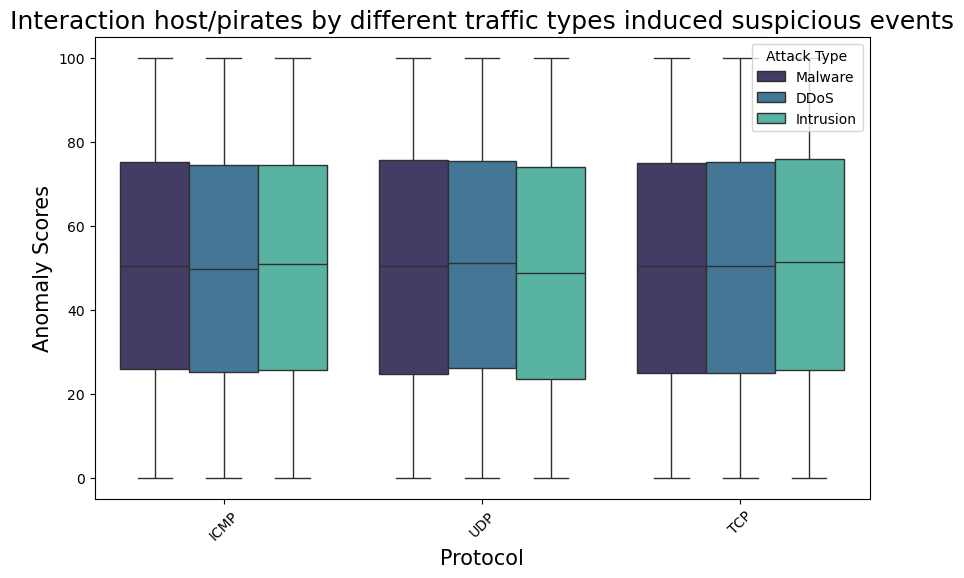

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Protocol", y="Anomaly Scores", hue="Attack Type", data=df , palette="mako")
plt.title("Interaction host/pirates by different traffic types induced suspicious events", fontsize=18)
plt.xlabel("Protocol", fontsize=15)
plt.ylabel("Anomaly Scores", fontsize=15)
plt.xticks(rotation=45)
plt.legend(title="Attack Type")
plt.show()

# The protocols define the communication between devices and in certains conditions, the pirates can hide theirs attacks by using some of them to hijack firewalls or others defense related responses.
#For exemple, ICMP are often used in intrusion contexts because they allow to scann all destinations port to find one of them which be open.
#The UDP and TCP protocols are also used for malwares and DDos attacks [4 - 7].
#Under our conditions, all types of attack use the same type of traffic and induce the same quality of anomalous event detection, suggesting abscence of intercteraction between the modalities.

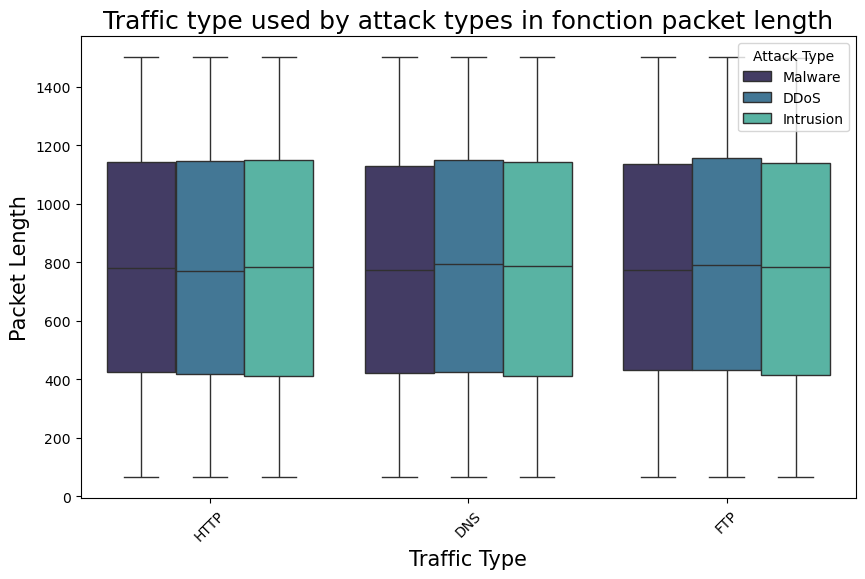

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Traffic Type", y="Packet Length", hue="Attack Type", data=df , palette="mako")
plt.title("Traffic type used by attack types in fonction packet length", fontsize=18)
plt.xlabel("Traffic Type", fontsize=15)
plt.ylabel("Packet Length", fontsize=15)
plt.xticks(rotation=45)
plt.legend(title="Attack Type")
plt.show()
# The nature of the traffic is also an other network parameter involved in communication. They describe the kind of informations which are transmitted between devices thanks to protocols.
#They is involved in the access of the device integrity by hackers. They can be safe (web browsing, e-mail) or dangerous (DDoS, data exfiltration) depending on its behavior or source.
#traffic type defines the priority and management of network packets. These define a data transmission unit belonging to a communication flow, with the structure of a header
#(information needed to ensure proper routing, such as IP address, port, protocol, etc.), a payload (nature of the content) and a tail (error detection) [8].
#Packets can be vectors carrying malicious content capable of infecting devices via various types of traffic, some of which may be legitimate (= covert channels [9]).
#Depending on the type of attack, packets will be of different sizes, i.e. larger for DDoS than for malware. Generally speaking, intrusions use smaller volumes of packets than the other two types of attack [1].
#Thus the combinaison of packet and traffic type may indicate an attack or suspicious activity.
#In our conditions, all type attacks used the same kind of traffic type with comparable packet lenght, suggesting no link between these parameters.

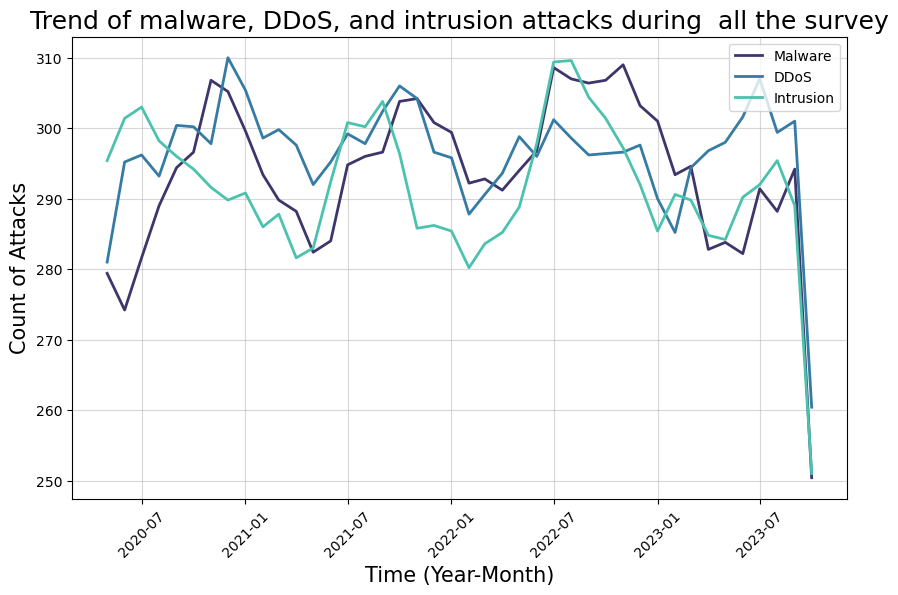

In [12]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['YearMonth'] = df['Timestamp'].dt.to_period('M')
attack_types = ['Malware', 'DDoS', 'Intrusion']
colors = sns.color_palette("mako", n_colors=len(attack_types))
plt.figure(figsize=(10, 6))

for i, attack in enumerate(attack_types):
    attack_data = df[df['Attack Type'] == attack].groupby('YearMonth').size().reset_index(name='AttackCount')
    attack_data['Mean'] = attack_data['AttackCount'].rolling(window=5).mean()
    attack_data['YearMonth'] = attack_data['YearMonth'].dt.to_timestamp()
    plt.plot(attack_data['YearMonth'], attack_data['Mean'], label=attack, linewidth=2, color=colors[i])


plt.title('Trend of malware, DDoS, and intrusion attacks during  all the survey', fontsize=18)
plt.xlabel('Time (Year-Month)', fontsize=15)
plt.ylabel('Count of Attacks', fontsize=15)
plt.xticks(rotation=45)
plt.legend(fontsize=10, loc='upper right')
plt.grid(alpha=0.5)
plt.show()

#To finish our exploration, we focused on the timstamp to have an temporal macrovision of out survey and try to see if some of
#attack types present typical dates to isolate some of them. We made this figure to plot the trend of malware, DDoS and inturions events
#during all the timestamp described by our data set. Unfortunately, they had the same pattern and comportments during all the study.
#This result showed the time scale of our data set can not be used to extract typical informations of different attack types.


In [13]:
#Conclusions:
#From our exploration of raw data showed, we found no evident links between variables due to high variability levels intra and inter attributes.
#That suggests we need to go further in understanding our database. For example, we can transform and create new variables from the raw data or
#find new ones to try and create links between them. This step features engeneering would enable us to improve our analysis and maxmise the
#chance to predict, with the best efficiency, the attack types thanks to machine learning. Thus the next part of this notebook describe
#in detail our feature enhancement before to start the machine learning stage.

In [14]:
#Bibliographical references:
#[2]: "Il était une faille: Histoires marquantes de cybersécurité pour frissonner et s’en protéger by Marine Du Mesnil and Paul Molin", Ed. theodo
#[1]: https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks/data
#[3]: https://blog.netwrix.fr/2023/07/20/liste-des-vulnerabilites-liees-aux-ports-ouverts/
#[4]: https://fr.radware.com/security/ddos-knowledge-center/ddospedia/udp-flood/
#[5]: https://www.paloaltonetworks.com/blog/2014/06/udp-malware-hiding-place-of-choice/
#[6]: https://www.malwarepatrol.net/the-evolution-of-c2-communication-channels/
#[7]: https://hogonext.com/how-to-detect-and-mitigate-tcp-based-ddos-attacks/
#[8]: https://www.techtarget.com/searchnetworking/definition/packet
#[9]: https://www.dst.defence.gov.au/sites/default/files/publications/documents/DST-Group-TN-1695.pdf
